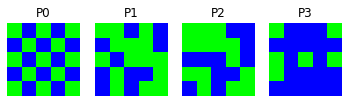

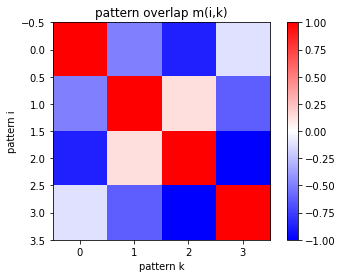

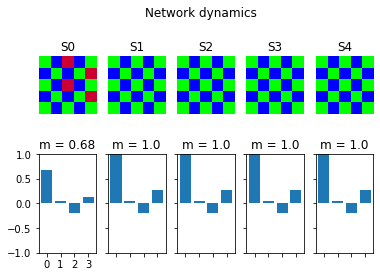

In [10]:
## Hopfield Network model of associative memory
# Getting started
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5 

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

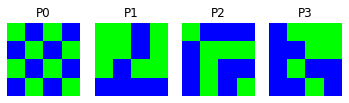

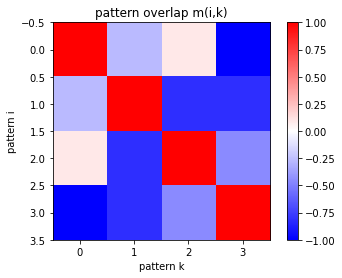

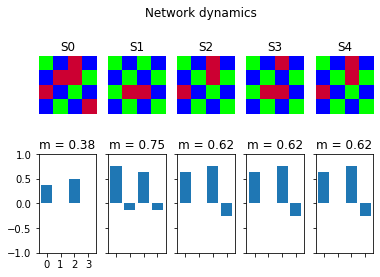

In [22]:
### Exercise: N=4x4 Hopfield-network
## Question: Storing a single pattern
# Create a network with N=16 neurons.
hopfield_net = network.HopfieldNetwork(nr_neurons= 16)

# Create a single 4 by 4 checkerboard pattern
factory = pattern_tools.PatternFactory(4, 4) 

checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# Store the checkerboard in the network
hopfield_net.store_patterns(pattern_list)

# Set the initial state of the network to a noisy version of the checkerboard
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
# test whether the network can still retrieve the pattern if we increase the number of flipped pixels.
hopfield_net.set_state_from_pattern(noisy_init_state)

# Let the network dynamics evolve for 4 iterations
states = hopfield_net.run_with_monitoring(nr_steps=4)

states_as_patterns = factory.reshape_patterns(states)

# Plot the sequence of network states along with the overlap of network state with the checkerboard
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

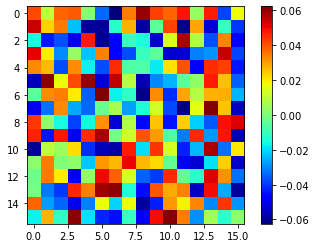

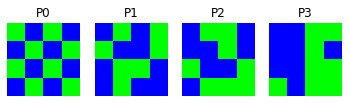

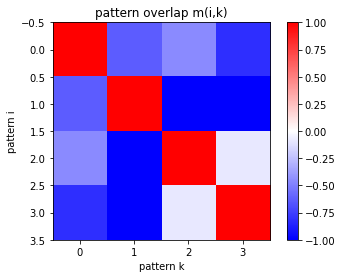

In [27]:
## Question: the weights matrix
# Create a new 4x4 network. Do not yet store any pattern
hopfield_net = network.HopfieldNetwork(nr_neurons= 16)

# Visualize the weight matrix
plot_tools.plot_network_weights(hopfield_net)

# Create a checkerboard, store it in the network
factory = pattern_tools.PatternFactory(4, 4) 

checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

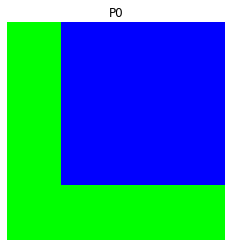

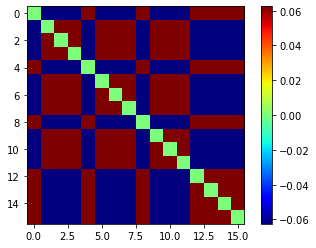

In [63]:
# Create a new 4x4 network
hopfield_net = network.HopfieldNetwork(nr_neurons= 16)

# Create an L-shaped pattern, store it in the network
factory = pattern_tools.PatternFactory(4,4)

pattern_list = [factory.create_L_pattern(l_width=1)]

plot_tools.plot_pattern_list(pattern_list)

# Plot the weights matrix
hopfield_net.store_patterns(pattern_list)
plot_tools.plot_network_weights(hopfield_net)

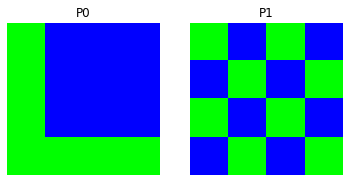

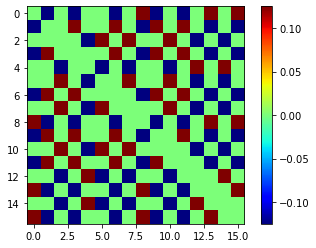

In [62]:
# Create a new 4x4 network.
hopfield_net = network.HopfieldNetwork(nr_neurons= 16)

# Create a checkerboard and an L-shaped pattern, store both patterns in the network
factory = pattern_tools.PatternFactory(4, 4) 

checkerboard = factory.create_checkerboard()
pattern_list = [factory.create_L_pattern(l_width=1), checkerboard]

plot_tools.plot_pattern_list(pattern_list)

# Plot the weights matrix
hopfield_net.store_patterns(pattern_list)
plot_tools.plot_network_weights(hopfield_net)


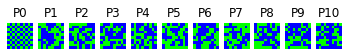

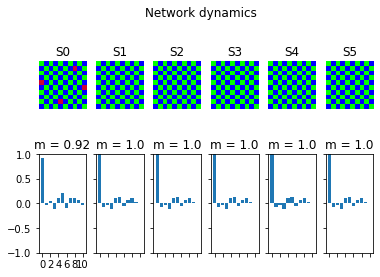

In [65]:
## Exercise: Capacity of an N=100 Hopfield-network
# C_store = 0.105
# N = 100
# K = M_max = 10.5
# Create an N=10x10 network and store a checkerboard pattern together with (K−1) random patterns.
hopfield_net = network.HopfieldNetwork(nr_neurons= 100)

factory = pattern_tools.PatternFactory(10, 10) 

checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

pattern_list.extend(factory.create_random_pattern_list(nr_patterns=10, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

hopfield_net.store_patterns(pattern_list)

# initialize the network with the unchanged checkerboard pattern
init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(init_state)

# the network evolve for five iterations
states = hopfield_net.run_with_monitoring(nr_steps=5)

states_as_patterns = factory.reshape_patterns(states)

plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


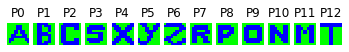

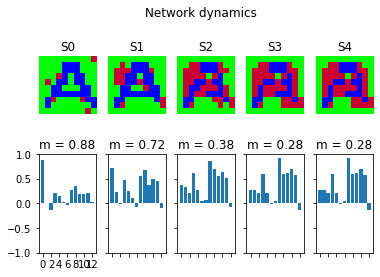

In [68]:
## Exercise: Non-random patterns
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# add 'R' to letter list
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z','R']

# increase number of letters and observe the change of overlap between the network state and the reference pattern ‘A’ 
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z','R','P','O','N','M','T']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")